In [78]:
! pip install sqlalchemy
! pip install pyodbc
! pip install seaborn
! pip install scipy

   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   ---- ----------------------------------- 4.5/43.6 MB 24.5 MB/s eta 0:00:02
   -------- ------------------------------- 9.7/43.6 MB 24.2 MB/s eta 0:00:02
   -------------- ------------------------- 15.7/43.6 MB 25.4 MB/s eta 0:00:02
   ------------------- -------------------- 21.8/43.6 MB 26.5 MB/s eta 0:00:01
   ------------------------- -------------- 28.0/43.6 MB 26.6 MB/s eta 0:00:01
   ----------------------------- ---------- 32.5/43.6 MB 25.5 MB/s eta 0:00:01
   --------------------------------- ------ 36.4/43.6 MB 24.6 MB/s eta 0:00:01
   ---------------------------------------  43.3/43.6 MB 25.5 MB/s eta 0:00:01
   ---------------------------------------- 43.6/43.6 MB 23.5 MB/s eta 0:00:00


In [80]:
from sqlalchemy import create_engine, Table, URL, inspect
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [81]:
SERVER = 'localhost'
DATABASE = 'AdventureWorks2022'

connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;Encrypt=no'

connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})

engine = create_engine(connection_url)

In [82]:
# Creating the connection between the database and Python application.
connection = engine.connect()
print(type(connection))

<class 'sqlalchemy.engine.base.Connection'>


INSPECTING THE DATABASE

In [8]:
# All tables that exist in the database 'AdventureWorks2022'

query = """
        SELECT table_name AS 'Tables Namn'
        FROM information_schema.tables
        WHERE table_type = 'BASE TABLE' 
        """
df = pd.read_sql(query, con = connection)
df.head(75)


,Tables Namn
0,SalesTaxRate
1,PersonCreditCard
2,PersonPhone
3,SalesTerritory
4,PhoneNumberType
...,...
70,Location
71,Password
72,SalesPersonQuotaHistory
73,Person


In [41]:
# Product Category 
query = """SELECT ProductCategoryID, 
           Name AS 'Product Category', 
           rowguid, 
           ModifiedDate
        
        FROM Production.ProductCategory"""
df = pd.read_sql(query, con = connection)
df.head()


,ProductCategoryID,Product Category,rowguid,ModifiedDate
0,1,Bikes,CFBDA25C-DF71-47A7-B81B-64EE161AA37C,2008-04-30
1,2,Components,C657828D-D808-4ABA-91A3-AF2CE02300E9,2008-04-30
2,3,Clothing,10A7C342-CA82-48D4-8A38-46A2EB089B74,2008-04-30
3,4,Accessories,2BE3BE36-D9A2-4EEE-B593-ED895D97C2A6,2008-04-30


In [10]:
# Sales orders summary information. The table shows the sales orders with the highest number of units sold.
# The total price includes subtotal, taxes and freight. 

query ="""SELECT TOP 10
       A.SalesOrderID, 
       ProductID,
	   OrderDate, 
	   SalesPersonID,
	   ShipToAddressID,
	   B.OrderQty,
	  B.UnitPrice AS 'Unit Price',
	  TotalDue AS 'Total Price'

	   
FROM Sales.SalesOrderHeader AS A INNER JOIN Sales.SalesOrderDetail AS B
ON A.SalesOrderID = B.SalesOrderID
ORDER BY ProductID, OrderQty DESC;


"""
df = pd.read_sql(query, con = connection)
df

,SalesOrderID,ProductID,OrderDate,SalesPersonID,ShipToAddressID,OrderQty,Unit Price,Total Price
0,47355,707,2012-07-31,276,992,24,18.5043,145741.8553
1,51154,707,2013-05-30,281,1024,24,15.7455,61090.6927
2,53472,707,2013-07-31,282,642,20,19.2445,103883.1767
3,51109,707,2013-05-30,288,731,20,15.7455,76533.1626
4,50738,707,2013-04-30,275,25,17,18.5043,49173.3806
5,57067,707,2013-09-30,288,754,16,19.2445,40201.4956
6,51168,707,2013-05-30,290,682,16,15.7455,26541.9771
7,49890,707,2013-02-28,274,1024,15,18.5043,48088.1391
8,53475,707,2013-07-31,290,701,15,19.2445,44557.9093
9,67287,707,2014-03-01,281,1069,15,19.2445,83955.4920


In [ ]:
# Information about the employees, type of title, date of hiring and addresses.
query = """SELECT TOP (15) 
    p.BusinessEntityID, 
    p.FirstName + ' ' + p.LastName AS 'Employee Name',
    p.PersonType AS 'Person Type',
    e.JobTitle AS 'Job Title',
    e.HireDate,
    a.AddressLine1,
    a.PostalCode,
    a.City
FROM Person.Person p JOIN HumanResources.Employee e 
ON p.BusinessEntityID = e.BusinessEntityID

INNER JOIN Person.BusinessEntityAddress ea 
ON e.BusinessEntityID = ea.BusinessEntityID 

INNER JOIN Person.Address a ON ea.AddressID = a.AddressID  

ORDER BY BusinessEntityID ASC;
"""
df = pd.read_sql(query, con = connection)
df

,BusinessEntityID,Employee Name,Person Type,Job Title,HireDate,AddressLine1,PostalCode,City
0,1,Ken Sánchez,EM,Chief Executive Officer,2009-01-14,4350 Minute Dr.,98006,Newport Hills
1,2,Terri Duffy,EM,Vice President of Engineering,2008-01-31,7559 Worth Ct.,98055,Renton
2,3,Roberto Tamburello,EM,Engineering Manager,2007-11-11,2137 Birchwood Dr,98052,Redmond
3,4,Rob Walters,EM,Senior Tool Designer,2007-12-05,5678 Lakeview Blvd.,55402,Minneapolis
4,5,Gail Erickson,EM,Design Engineer,2008-01-06,9435 Breck Court,98004,Bellevue
5,6,Jossef Goldberg,EM,Design Engineer,2008-01-24,5670 Bel Air Dr.,98055,Renton
6,7,Dylan Miller,EM,Research and Development Manager,2009-02-08,7048 Laurel,98028,Kenmore
7,8,Diane Margheim,EM,Research and Development Engineer,2008-12-29,475 Santa Maria,98201,Everett
8,9,Gigi Matthew,EM,Research and Development Engineer,2009-01-16,7808 Brown St.,98004,Bellevue
9,10,Michael Raheem,EM,Research and Development Manager,2009-05-03,1234 Seaside Way,94109,San Francisco


In [26]:
# It may be important for the company to know how many clients it has had.

query = """ SELECT COUNT(*) AS total_customers FROM Sales.Customer; """

df = pd.read_sql(query, con = connection)
df

,total_customers
0,19820


In [31]:
# We can find out how many products were sold in a 3-year period.

query = """ SELECT TOP (10)
    p.Name AS 'Product Name',
    SUM(sod.OrderQty) AS 'Total Quantity Sold'
    
FROM Sales.SalesOrderDetail sod INNER JOIN Sales.SalesOrderHeader soh 
ON sod.SalesOrderID = soh.SalesOrderID
INNER JOIN Production.Product p ON sod.ProductID = p.ProductID

WHERE soh.OrderDate BETWEEN '2011-01-01' AND '2014-01-01'
GROUP BY p.Name
ORDER BY 'Total Quantity Sold' DESC;

"""

df = pd.read_sql(query, con = connection)
df

,Product Name,Total Quantity Sold
0,"Long-Sleeve Logo Jersey, L",5333
1,AWC Logo Cap,5289
2,"Sport-100 Helmet, Blue",3943
3,"Sport-100 Helmet, Black",3768
4,"Sport-100 Helmet, Red",3449
5,"Full-Finger Gloves, L",3371
6,"Long-Sleeve Logo Jersey, M",2805
7,"Classic Vest, S",2772
8,"Half-Finger Gloves, M",2491
9,"Short-Sleeve Classic Jersey, XL",2413


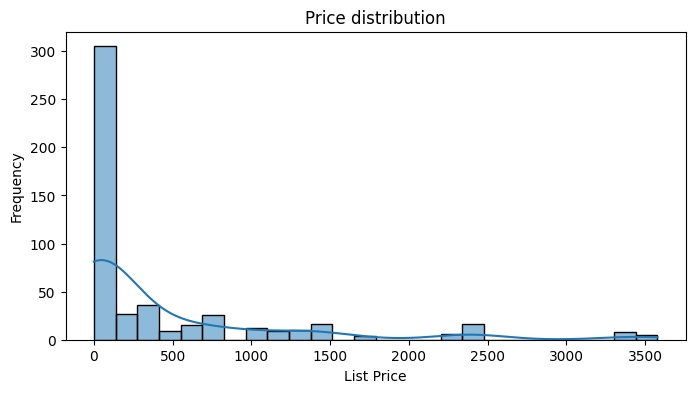

In [ ]:
# Price visualization. This graph describes how prices are distributed.
# The tallest bar shows products that are priced lower, while the small bars show products with higher prices.
query = """
SELECT Name AS 'Product Name',
ListPrice AS 'List Price' FROM Production.Product
ORDER BY 'List Price' DESC;
"""
df = pd.read_sql(query, con = connection)

# Price distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['List Price'], kde=True)
plt.title('Price distribution')
plt.xlabel('List Price')
plt.ylabel('Frequency')
plt.show()


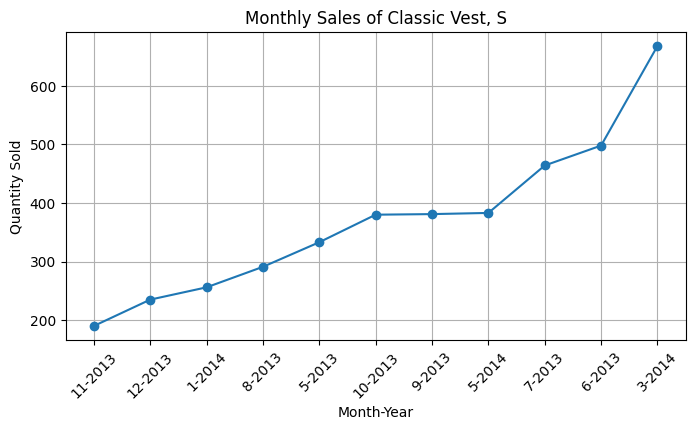

In [ ]:
# Monthly sales of products, in this case I have chosen the best-selling product.
query = """
SELECT 
    p.Name AS ProductName,
    YEAR(soh.OrderDate) AS Year,
    MONTH(soh.OrderDate) AS Month,
    SUM(sod.OrderQty) AS 'Total Quantity Sold'

FROM Sales.SalesOrderDetail sod INNER JOIN Sales.SalesOrderHeader soh 
ON sod.SalesOrderID = soh.SalesOrderID 
INNER JOIN Production.Product p ON sod.ProductID = p.ProductID

GROUP BY p.Name, YEAR(soh.OrderDate), MONTH(soh.OrderDate)
ORDER BY 'Total Quantity Sold' ASC;
"""
df = pd.read_sql(query, con = connection)

# Monthly Sales of 'Classic Vest"
product_name = 'Classic Vest, S' 
df_product = df[df['ProductName'] == product_name]

plt.figure(figsize=(8, 4))
plt.plot(df_product['Month'].astype(str) + '-' + df_product['Year'].astype(str), df_product['Total Quantity Sold'], marker='o')
plt.title(f'Monthly Sales of {product_name}')
plt.xlabel('Month-Year')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


By investigating the different tables on products, customers, employees. We can analize and classify the best sales.

C:\Users\gisse\AppData\Local\Temp\ipykernel_27192\1813910048.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Sales', y='Product Name', data=df, palette='viridis')


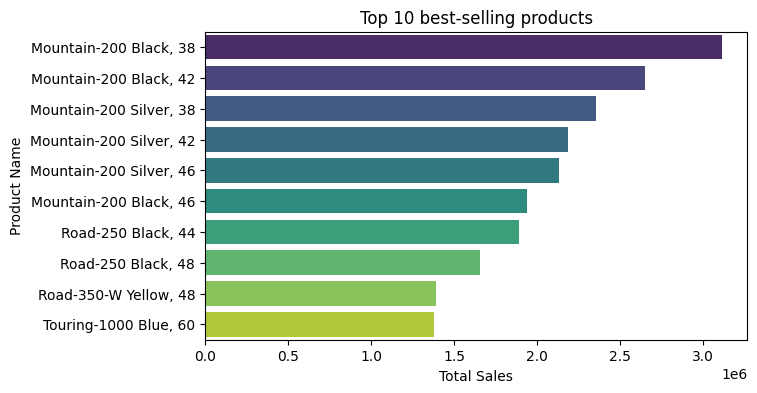

In [72]:
# In the analysis of best sellers, I decided to analyze the sales of the 10 best-selling products.

query = """SELECT TOP (10)
    P.Name AS 'Product Name',
    SUM(od.OrderQty * od.UnitPrice) AS 'Total Sales'
FROM 
    Sales.SalesOrderDetail od INNER JOIN Production.Product p ON od.ProductID = p.ProductID
GROUP BY P.Name
ORDER BY 'Total Sales' DESC;
"""
df = pd.read_sql(query, con = connection)

plt.figure(figsize=(7, 4))
sns.barplot(x='Total Sales', y='Product Name', data=df, palette='viridis')
plt.title('Top 10 best-selling products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()


Data analysis with a confidence interval based on 'Total Sales'.

C:\Users\gisse\AppData\Local\Temp\ipykernel_27192\2708075.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Products Sold', y='Employee Name', data=df, palette='viridis')


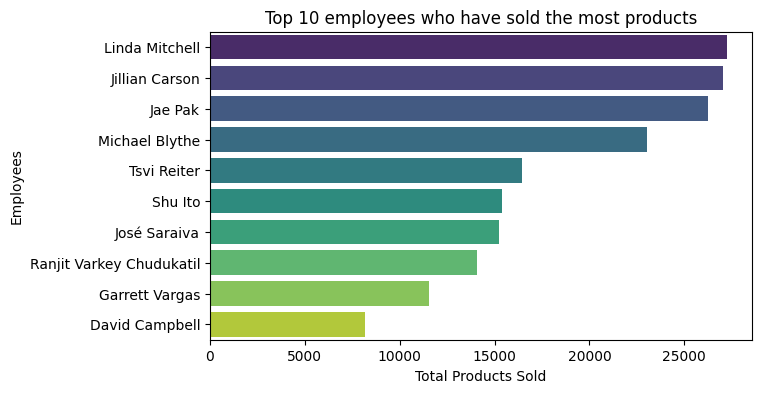

In [98]:
# Here are the top 10 employees who have sold the most products. It could be considered giving a bonus for those who have the most sales.

query = """SELECT TOP (10)
    P.BusinessEntityID,
    p.FirstName + ' ' + p.LastName AS 'Employee Name',
    SUM(od.OrderQty) AS 'Total Products Sold',
    SUM(od.OrderQty * od.UnitPrice) AS 'Total Sales'

    
FROM Sales.SalesOrderHeader soh JOIN Sales.SalesOrderDetail od 
ON soh.SalesOrderID = od.SalesOrderID
JOIN Person.Person p ON soh.SalesPersonID = p.BusinessEntityID

GROUP BY p.BusinessEntityID, p.FirstName, p.LastName
ORDER BY 'Total Products Sold' DESC;
    """
df = pd.read_sql(query, con = connection)


plt.figure(figsize=(7, 4))
sns.barplot(x='Total Products Sold', y='Employee Name', data=df, palette='viridis')
plt.title('Top 10 employees who have sold the most products')
plt.xlabel('Total Products Sold')
plt.ylabel('Employees')
plt.show()

In [91]:
# Confidence interval based of total sales.

query = """SELECT TOP (10)
    P.BusinessEntityID,
    p.FirstName + ' ' + p.LastName AS 'Employee Name',
    SUM(od.OrderQty) AS 'Total Products Sold',
    SUM(od.OrderQty * od.UnitPrice) AS 'Total Sales'

    
FROM Sales.SalesOrderHeader soh JOIN Sales.SalesOrderDetail od 
ON soh.SalesOrderID = od.SalesOrderID
JOIN Person.Person p ON soh.SalesPersonID = p.BusinessEntityID

GROUP BY p.BusinessEntityID, p.FirstName, p.LastName
ORDER BY 'Total Products Sold' DESC;
"""
df = pd.read_sql(query, con=connection)
print(df.head(10))


mean_sales = np.mean(df['Total Sales']) # Mean

#Standard deviation with ddof=1 for a sample. (ddof = degrees of freedom/frihetgrader)

standard_sales = np.std(df['Total Sales'], ddof=1) 
n = len(df) 

# The t-value for the 95% confidence interval
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha / 2, df=n - 1) 


margin_of_error = t_critical * (standard_sales / np.sqrt(n))

# Confidence interval
lower_bound = mean_sales - margin_of_error
upper_bound = mean_sales + margin_of_error

print()
print(f"Medelvärde av TotalSales: {mean_sales:.2f}")
print(f"Konfidensintervall för medelvärde (95%): ({lower_bound:.2f}, {upper_bound:.2f})")



   BusinessEntityID             Employee Name  Total Products Sold  \
0               276            Linda Mitchell                27229   
1               277            Jillian Carson                27051   
2               289                   Jae Pak                26231   
3               275            Michael Blythe                23058   
4               279               Tsvi Reiter                16431   
5               281                   Shu Ito                15397   
6               282              José Saraiva                15220   
7               290  Ranjit Varkey Chudukatil                14085   
8               278            Garrett Vargas                11544   
9               283            David Campbell                 8172   

    Total Sales  
0  1.044463e+07  
1  1.009504e+07  
2  8.541814e+06  
3  9.324137e+06  
4  7.209089e+06  
5  6.503523e+06  
6  5.964522e+06  
7  4.548982e+06  
8  3.631750e+06  
9  3.756862e+06  

Medelvärde av TotalSales: 7002